In [20]:
import tensorflow as tf
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [22]:
import Io_tf_binary_general as io

In [23]:
import Dnn_uniwersalny as dnn

In [24]:

from sklearn.utils import shuffle

In [25]:
#na poczatek cos prostego
def kolko_w_kolku(sig1=0.4,sig2=0.6,R2=1.,N=1000):
    """to ma utworzyc dane ktore posluza mi do sprawdzenia czy i jak dziala model"""
    features=[]
    labels=[]
    for i in range(N):
        x=np.random.normal(0,sig1)
        y=np.random.normal(0,sig1)
        features.append([x,y])
        labels.append(0)
    for i in range(N):
        alpha=np.random.uniform()*2*np.pi
        delr=np.random.normal(0,sig2)
        r=R2+delr
        x=np.cos(alpha)*r
        y=np.sin(alpha)*r
        features.append([x,y])
        labels.append(1)
    features=np.array(features)
    labels=np.array(labels)
    features,labels=shuffle(features,labels)
    return features,labels

In [26]:
def rysoj_dane(f,l):
    plt.clf()
    plt.scatter(f[:,0],f[:,1],c=l,s=5)

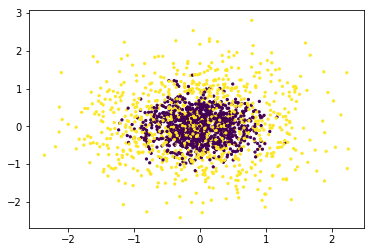

In [27]:
rysoj_dane(*kolko_w_kolku())

In [50]:
zapisywacz=io.Io_tf_binary_general("dane_do_kolko_w_kolku",'w')

In [51]:
f,l=kolko_w_kolku()

In [52]:
def losowa():
    return np.random.randint(0,2)

In [53]:
for i in range(len(f)):
    zapisywacz.write_general(features={"wsporzedne_2d":10**8*f[i],
            "kategoryczna":losowa()},l=l[i])

In [54]:
zapisywacz.close()

In [55]:
model=dnn.Dnn_uniwersalny("dane_do_kolko_w_kolku",[10],"kolko_w_kolku_estymator")

{'wsporzedne_2d': FixedLenFeature(shape=[2], dtype=tf.float32, default_value=None), 'kategoryczna': FixedLenFeature(shape=[1], dtype=tf.int64, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}


In [56]:
model.make_model({"kategoryczna":[0,1]})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'kolko_w_kolku_estymator/tensorflowowy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f495193e400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
model.train()

{'wsporzedne_2d': FixedLenFeature(shape=[2], dtype=tf.float32, default_value=None), 'kategoryczna': FixedLenFeature(shape=[1], dtype=tf.int64, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into kolko_w_kolku_estymator/tensorflowowy/model.ckpt.
INFO:tensorflow:loss = 89.822525, step = 1
INFO:tensorflow:global_step/sec: 57.4626
INFO:tensorflow:loss = 68.20074, step = 101 (1.741 sec)
INFO:tensorflow:global_step/sec: 67.8747
INFO:tensorflow:loss = 67.55793, step = 201 (1.476 sec)
INFO:tensorflow:global_step/sec: 58.667
INFO:tensorflow:loss = 62.81418, step = 301 (1.702 sec)
INFO:tensorflow:global_step/sec: 63.6685
INFO:tensorflow:loss = 73.06662, step = 401 (1.570 sec)
I

In [58]:
model.evaluate()

{'wsporzedne_2d': FixedLenFeature(shape=[2], dtype=tf.float32, default_value=None), 'kategoryczna': FixedLenFeature(shape=[1], dtype=tf.int64, default_value=None), 'label': FixedLenFeature(shape=[], dtype=tf.int64, default_value=None)}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-28-15:06:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kolko_w_kolku_estymator/tensorflowowy/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation

{'accuracy': 0.759,
 'accuracy_baseline': 0.5,
 'auc': 0.8044246,
 'auc_precision_recall': 0.8480624,
 'average_loss': 0.50680196,
 'label/mean': 0.5,
 'loss': 64.87065,
 'precision': 0.807601,
 'prediction/mean': 0.50142723,
 'recall': 0.68,
 'global_step': 3000}